# Unit 12 - Tales from the Crypto

---


## 1. Sentiment Analysis

Use the [newsapi](https://newsapi.org/) to pull the latest news articles for Bitcoin and Ethereum and create a DataFrame of sentiment scores for each coin.

Use descriptive statistics to answer the following questions:
1. Which coin had the highest mean positive score?
2. Which coin had the highest negative score?
3. Which coin had the highest positive score?

In [39]:
# Initial imports
import os
import pandas as pd
from dotenv import load_dotenv
import nltk as nltk
nltk.download('vader_lexicon')
from nltk.sentiment.vader import SentimentIntensityAnalyzer
analyzer = SentimentIntensityAnalyzer()
from newsapi import NewsApiClient
from nltk.stem import WordNetLemmatizer  
import spacy

%matplotlib inline

[nltk_data] Downloading package vader_lexicon to
[nltk_data]     C:\Users\harne\AppData\Roaming\nltk_data...
[nltk_data]   Package vader_lexicon is already up-to-date!


In [40]:
# Read your api key environment variable
api_key = os.getenv("NEWS_API")

In [41]:
# Create a newsapi client
newsapi = NewsApiClient(api_key)


In [42]:
# Fetch the Bitcoin news articles
bitcoin_article = newsapi.get_everything(
    q="bitcoin",
    language="en",
    page_size=100,
    sort_by="publishedAt"
)
bitcoin_article["articles"][0]


{'source': {'id': None, 'name': 'The Mac Observer'},
 'author': 'Charlotte Henry',
 'title': 'Tim Cook Dismisses Idea Apple Will Accept Payment in Cryptocurrency',
 'description': 'Tim Cook dismissed the idea that Apple will accept cryptocurrency in exchange for products during an\xa0appearance at the Dealbook conference. He also said the company would not buy it with corporate funds. However, the Apple CEO did reveal that he personally ow…',
 'url': 'https://www.macobserver.com/news/tim-cook-dismisses-idea-apple-will-cryptocurrency/',
 'urlToImage': 'https://www.macobserver.com/wp-content/uploads/2021/11/Tim-Cook-Bitcoin-1024x538.png',
 'publishedAt': '2021-11-09T16:21:15Z',
 'content': 'Tim Cook dismissed the idea that Apple will accept cryptocurrency in exchange for products during an\xa0appearance at the Dealbook conference. He also said the company would not buy it with corporate fu… [+959 chars]'}

In [43]:
# Fetch the Ethereum news articles
ethereum_article = newsapi.get_everything(
    q="ethereum",
    language="en",
    page_size=100,
    sort_by="publishedAt"
)
ethereum_article["articles"][0]


{'source': {'id': None, 'name': 'The Mac Observer'},
 'author': 'Charlotte Henry',
 'title': 'Tim Cook Dismisses Idea Apple Will Accept Payment in Cryptocurrency',
 'description': 'Tim Cook dismissed the idea that Apple will accept cryptocurrency in exchange for products during an\xa0appearance at the Dealbook conference. He also said the company would not buy it with corporate funds. However, the Apple CEO did reveal that he personally ow…',
 'url': 'https://www.macobserver.com/news/tim-cook-dismisses-idea-apple-will-cryptocurrency/',
 'urlToImage': 'https://www.macobserver.com/wp-content/uploads/2021/11/Tim-Cook-Bitcoin-1024x538.png',
 'publishedAt': '2021-11-09T16:21:15Z',
 'content': 'Tim Cook dismissed the idea that Apple will accept cryptocurrency in exchange for products during an\xa0appearance at the Dealbook conference. He also said the company would not buy it with corporate fu… [+959 chars]'}

In [44]:
# Create the Bitcoin sentiment scores DataFrame
bt_sentiments = []

for article in bitcoin_article["articles"]:
    try:
        text = article["content"]
        date = article["publishedAt"][:10]
        sentiment = analyzer.polarity_scores(text)
        compound = sentiment["compound"]
        pos = sentiment["pos"]
        neu = sentiment["neu"]
        neg = sentiment["neg"]
        
        bt_sentiments.append({
            "text": text,
            "date": date,
            "compound": compound,
            "positive": pos,
            "negative": neg,
            "neutral": neu
            
        })
        
    except AttributeError:
        pass    
# Create DataFrame
bt_sentiment_df = pd.DataFrame(bt_sentiments)

# Reorder DataFrame columns
cols = ["date", "text", "compound", "positive", "negative", "neutral"]
bt_sentiment_df = bt_sentiment_df[cols]

bt_sentiment_df.head()


,date,text,compound,positive,negative,neutral
0,2021-11-09,Tim Cook dismissed the idea that Apple will ac...,0.3818,0.071,0.000,0.929
1,2021-11-09,Apple CEO Tim Cook said he owns cryptocurrency...,0.4019,0.076,0.000,0.924
2,2021-11-09,United Kingdom-based crypto mining company Arg...,0.4215,0.080,0.000,0.920
3,2021-11-09,From a dodgy digital currency inspired by Netf...,0.3182,0.148,0.113,0.739
4,2021-11-09,The metaverse is a virtual world in which user...,0.0000,0.000,0.000,1.000


In [7]:
# Create the Ethereum sentiment scores DataFrame
ether_sentiments = []

for article in ethereum_article["articles"]:
    try:
        text = article["content"]
        date = article["publishedAt"][:10]
        sentiments = analyzer.polarity_scores(text)
        compound = sentiments["compound"]
        pos = sentiments["pos"]
        neu = sentiments["neu"]
        neg = sentiments["neg"]
        
        ether_sentiments.append({
            "text": text,
            "date": date,
            "compound": compound,
            "positive": pos,
            "negative": neg,
            "neutral": neu
          
        })
        
    except AttributeError:
        pass    

# Create DataFrame
ether_sentiment_df = pd.DataFrame(ether_sentiments)

# Reorder DataFrame columns
cols = ["date", "text", "compound", "positive", "negative", "neutral"]
ether_sentiment_df = ether_sentiment_df[cols]

ether_sentiment_df.head()
  


,date,text,compound,positive,negative,neutral
0,2021-11-09,CryptocurrencyBitcoin and Ether hit another ne...,0.0000,0.000,0.000,1.000
1,2021-11-09,"PLANO, Texas, Nov. 5, 2021 /PRNewswire/ -- Car...",0.1280,0.048,0.000,0.952
2,2021-11-09,Taken from the autumn 2021 issue of Dazed. You...,0.1531,0.118,0.127,0.756
3,2021-11-09,"London, England, 9th November, 2021, \r\nCloud...",0.0000,0.000,0.000,1.000
4,2021-11-09,M&amp;M Q2 standalone net surges over 8-fold t...,0.3182,0.067,0.000,0.933


In [8]:
# Describe the Bitcoin Sentiment
bt_desc = bt_sentiment_df.describe()
bt_positive_mean = bt_desc.loc['mean'].positive
bt_desc


,compound,positive,negative,neutral
count,100.000000,100.000000,100.000000,100.000000
mean,0.105763,0.068490,0.039720,0.891820
std,0.386850,0.072807,0.065737,0.092946
min,-0.920100,0.000000,0.000000,0.625000
25%,-0.029800,0.000000,0.000000,0.835000
50%,0.089950,0.065000,0.000000,0.917500
75%,0.345300,0.092500,0.065250,0.957750
max,0.950100,0.375000,0.370000,1.000000


In [9]:
# Describe the Ethereum Sentiment
ether_desc = ether_sentiment_df.describe()
ether_positive_mean = ether_desc.loc['mean'].positive
ether_desc


,compound,positive,negative,neutral
count,100.000000,100.000000,100.000000,100.000000
mean,0.222317,0.073290,0.020420,0.906270
std,0.334619,0.062622,0.040683,0.070693
min,-0.796400,0.000000,0.000000,0.756000
25%,0.000000,0.000000,0.000000,0.849000
50%,0.261600,0.068000,0.000000,0.919500
75%,0.480400,0.125250,0.000000,0.960500
max,0.850200,0.216000,0.218000,1.000000


In [45]:
print(f"\033[1m Mean postive score for Bitcoin articles is \033[92m{bt_positive_mean} \033[0m")
print(f"\033[1m Mean postive score for Ethereum articles is \033[92m{ether_positive_mean}\033[0m")
print(f"\033[1m The highest compound score for Bitcoin articles is \033[92m{bt_sentiment_df.describe().loc['max'].compound}\033[0m")
print(f"\033[1m The highest compound score for Ethereum articles is \033[92m{ether_sentiment_df.describe().loc['max'].compound}\033[0m")
print(f"\033[1m The highest positive score for Bitcoin articles is \033[92m{bt_sentiment_df.describe().loc['max'].positive}\033[0m")
print(f"\033[1m The highest positive score for Ethereum articles is \033[92m{ether_sentiment_df.describe().loc['max'].positive}\033[0m")

 Mean postive score for Bitcoin articles is 0.04554000000000001 
 Mean postive score for Ethereum articles is 0.06981000000000001
 The highest compound score for Bitcoin articles is 0.9501
 The highest compound score for Ethereum articles is 0.9165
 The highest positive score for Bitcoin articles is 0.359
 The highest positive score for Ethereum articles is 0.38


### Questions:

Q: Which coin had the highest mean positive score?

A: Ethereum has the highest mean postive score of 0.06981000000000001

Q: Which coin had the highest compound score?

A: Bitcoin has the highest compound score of 0.9501

Q. Which coin had the highest positive score?

A: Ethereum has the highest positive score of 0.38

---

## 2. Natural Language Processing
---
###   Tokenizer

In this section, you will use NLTK and Python to tokenize the text for each coin. Be sure to:
1. Lowercase each word.
2. Remove Punctuation.
3. Remove Stopwords.

In [48]:
from nltk.tokenize import word_tokenize, sent_tokenize
from nltk.corpus import stopwords
from nltk.stem import WordNetLemmatizer, PorterStemmer
from string import punctuation
import re

In [49]:
# Instantiate the lemmatizer
lemmatizer = WordNetLemmatizer()

# Create a list of stopwords
sw  = set(stopwords.words('english'))
print(sw)


{'with', 'before', "should've", 'which', 'can', 'was', 'this', 'few', 'were', "mightn't", 'through', 'under', 'own', "isn't", "wouldn't", 'aren', 'most', 'yourselves', 'while', "she's", 'y', 'ain', 'being', "that'll", 'its', 'don', 'whom', 'such', 'her', 'in', 'ourselves', 'because', 'are', 'very', "needn't", 'each', 'between', 'into', 'the', "hadn't", 'won', 'my', 've', 'our', 'to', 'again', 'further', 'is', 'myself', 'doing', "won't", 'isn', 'now', 'where', "couldn't", 'too', 'does', 'a', 'hasn', 'how', 'i', "aren't", 'ours', 'only', "doesn't", 'he', 'she', 's', 'weren', 'here', 'has', "it's", 'both', 'ma', 'm', 't', 'those', 'below', 'will', 'couldn', 'same', 'should', "you've", 'their', 'above', 'yourself', 'itself', "shouldn't", 'about', "you'll", 'when', 'it', 'more', 'shouldn', 'nor', 'wouldn', 'after', 'then', "didn't", 'some', 'up', 'no', 'them', 'there', 'hadn', 'who', 'theirs', 'wasn', 'shan', 'mustn', 'if', 'all', 'why', 'didn', 'do', "hasn't", 'doesn', 'have', 'his', 'not'

In [50]:
# Expand the default stopwords list if necessary
cust_sw = {'I','volatile','fake'}

In [51]:
# Complete the tokenizer function
def tokenizer(text):
    """Tokenizes text."""
    sw  = set(stopwords.words('english'))
    # Remove the punctuation from text
    regex = re.compile("[^a-zA-Z ]")
    re_clean = regex.sub('', text)
       
    # Create a tokenized list of the words
    words = word_tokenize(re_clean)
    
    # Lemmatize words into root words
    lemmatized = [lemmatizer.lemmatize(word) for word in words]
       
    # Convert the words to lowercase
    words_lower = [word.lower() for word in lemmatized ]
    
    # Remove the stop words
    lem_words = [word for word in words_lower if word.lower() not in sw.union(cust_sw)]
    
    return lem_words

In [52]:
# Create a new tokens column for Bitcoin
bt_sentiment_df['tokens'] = bt_sentiment_df.text.apply(tokenizer)
bt_sentiment_df.head()

,date,text,compound,positive,negative,neutral,tokens
0,2021-11-09,Tim Cook dismissed the idea that Apple will ac...,0.3818,0.071,0.000,0.929,"[tim, cook, dismissed, idea, apple, accept, cr..."
1,2021-11-09,Apple CEO Tim Cook said he owns cryptocurrency...,0.4019,0.076,0.000,0.924,"[apple, ceo, tim, cook, said, owns, cryptocurr..."
2,2021-11-09,United Kingdom-based crypto mining company Arg...,0.4215,0.080,0.000,0.920,"[united, kingdombased, crypto, mining, company..."
3,2021-11-09,From a dodgy digital currency inspired by Netf...,0.3182,0.148,0.113,0.739,"[dodgy, digital, currency, inspired, netflix, ..."
4,2021-11-09,The metaverse is a virtual world in which user...,0.0000,0.000,0.000,1.000,"[metaverse, virtual, world, user, represented,..."


In [53]:
# Create a new tokens column for Ethereum
ether_sentiment_df['tokens'] = ether_sentiment_df.text.apply(tokenizer)
ether_sentiment_df.head()

,date,text,compound,positive,negative,neutral,tokens
0,2021-10-16,A new cross-chain bridge is currently connecte...,0.0000,0.000,0.0,1.000,"[new, crosschain, bridge, currently, connected..."
1,2021-10-14,Mark Cuban has some advice for people who are ...,0.0000,0.000,0.0,1.000,"[mark, cuban, ha, advice, people, new, investi..."
2,2021-11-05,Ethereum and bitcoin are the two biggest crypt...,0.4588,0.094,0.0,0.906,"[ethereum, bitcoin, two, biggest, cryptocurren..."
3,2021-11-01,Elon Musk\r\npicture alliance / Getty Images\r...,0.5267,0.093,0.0,0.907,"[elon, muskpicture, alliance, getty, imagesa, ..."
4,2021-11-01,Cryptocurrency and business continuity line im...,0.4588,0.097,0.0,0.903,"[cryptocurrency, business, continuity, line, i..."


---

### NGrams and Frequency Analysis

In this section you will look at the ngrams and word frequency for each coin. 

1. Use NLTK to produce the n-grams for N = 2. 
2. List the top 10 words for each coin. 

In [54]:
from collections import Counter
from nltk import ngrams

In [64]:
# Generate the Bitcoin N-grams where N=2
bt_text = ' '.join(bt_sentiment_df.text)
bt_tokenized_text = tokenizer(bt_text)
bt_ngrams =  Counter(ngrams(bt_tokenized_text, 2))
bt_ngrams


In [56]:
# Generate the Ethereum N-grams where N=2
ether_text = ' '.join(ether_sentiment_df.text)
ether_tokenized_text = tokenizer(ether_text)
ether_ngrams =  Counter(ngrams(ether_tokenized_text, 2))
ether_ngrams

In [57]:
# Function token_count generates the top 10 words for a given coin
def token_count(tokens, N=10):
    """Returns the top N tokens from the frequency count"""
    return Counter(tokens).most_common(N)

In [58]:
# Use token_count to get the top 10 words for Bitcoin
#print(token_count(bt_tokenized_text))
token_count(bt_tokenized_text)

[('char', 96),
 ('bitcoin', 29),
 ('new', 24),
 ('cryptocurrency', 23),
 ('ha', 18),
 ('tuesday', 15),
 ('crypto', 15),
 ('cook', 13),
 ('market', 13),
 ('world', 12)]

In [59]:
# Use token_count to get the top 10 words for Ethereum
print(token_count(ether_tokenized_text))
token_count(ether_tokenized_text)

[('char', 99), ('cryptocurrency', 29), ('ethereum', 26), ('ha', 26), ('bitcoin', 25), ('new', 16), ('market', 12), ('record', 12), ('high', 12), ('crypto', 12)]


[('char', 99),
 ('cryptocurrency', 29),
 ('ethereum', 26),
 ('ha', 26),
 ('bitcoin', 25),
 ('new', 16),
 ('market', 12),
 ('record', 12),
 ('high', 12),
 ('crypto', 12)]

---

### Word Clouds

In this section, you will generate word clouds for each coin to summarize the news for each coin

In [67]:
from wordcloud import WordCloud
import matplotlib.pyplot as plt
plt.style.use('seaborn-whitegrid')
import matplotlib as mpl
mpl.rcParams['figure.figsize'] = [20.0, 10.0]

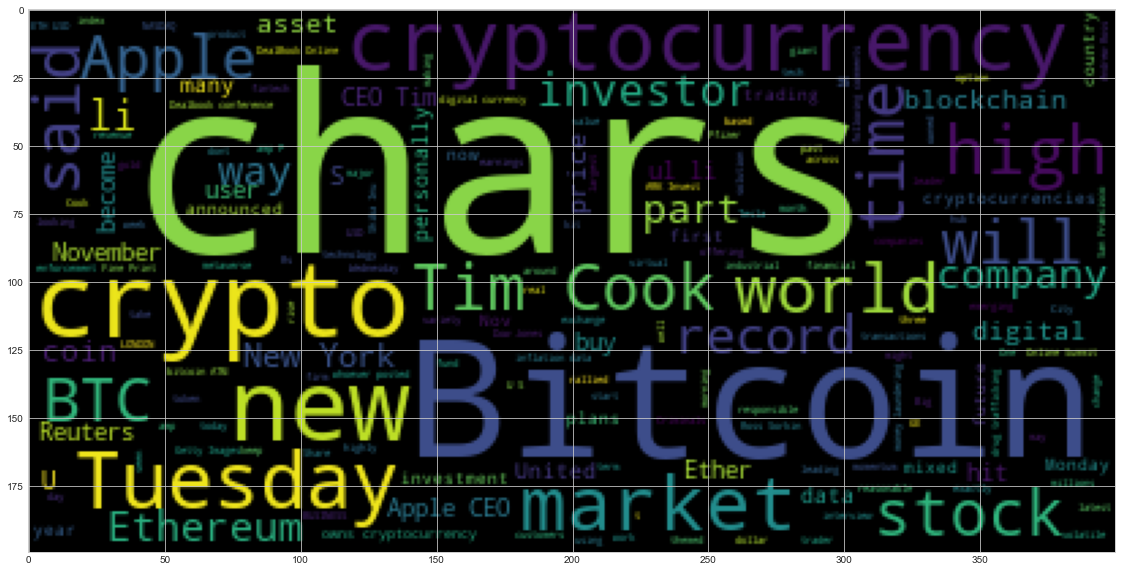

In [68]:
# Generate the Bitcoin word cloud
wc = WordCloud().generate(bt_text)
# render the plot
plt.imshow(wc)

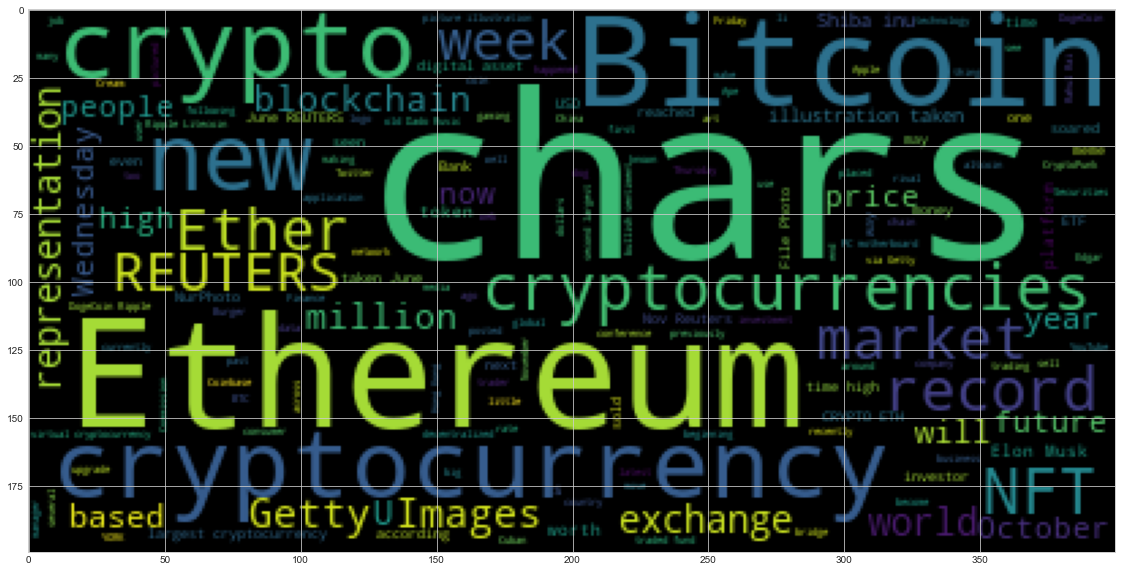

In [69]:
# Generate the Ethereum word cloud
wc = WordCloud().generate(ether_text)
# render the plot
plt.imshow(wc)

---
## 3. Named Entity Recognition

In this section, you will build a named entity recognition model for both Bitcoin and Ethereum, then visualize the tags using SpaCy.

In [40]:
import spacy
from spacy import displacy

In [43]:
# Download the language model for SpaCy
#!python -m spacy download en_core_web_sm

In [44]:
# Load the spaCy model
nlp = spacy.load('en_core_web_sm')

---
### Bitcoin NER

In [46]:
# Concatenate all of the Bitcoin text together
bt_txt_concat = ' '.join(bt_sentiment_df.text)

In [64]:
# Run the NER processor on all of the text
bt_doc = nlp(bt_txt_concat)

# Add a title to the document
bt_doc.user_data["title"] = "Bitcoin NER"

In [65]:
# Render the visualization
displacy.render(bt_doc, style='ent')

In [66]:
# List all Entities
entities = [ent.text + ' - ' + ent.label_  for ent in bt_doc.ents ]
print(entities)

NameError: name 'bt_doc' is not defined

---

### Ethereum NER

In [66]:
# Concatenate all of the Ethereum text together
ether_txt_concat = ' '.join(ether_sentiment_df.text)

In [67]:
# Run the NER processor on all of the text
ether_doc = nlp(ether_txt_concat)

# Add a title to the document
ether_doc.user_data["Title"]="Ethereum NER"

In [69]:
# Render the visualization
displacy.render(ether_doc, style='ent')

In [65]:
# List all Entities
entities = [ent.text + ' - ' + ent.label_  for ent in ether_doc.ents ]
print(entities)

NameError: name 'ether_doc' is not defined

---